In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import keras.datasets as d
help(d)

Help on package keras.datasets in keras:

NAME
    keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

FILE
    /Users/eunbilee/opt/anaconda3/envs/flyai/lib/python3.10/site-packages/keras/datasets/__init__.py




# 데이터

## 데이터 준비 : train / test

In [35]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# 이미지라서 묶어서 가져옴

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 확인

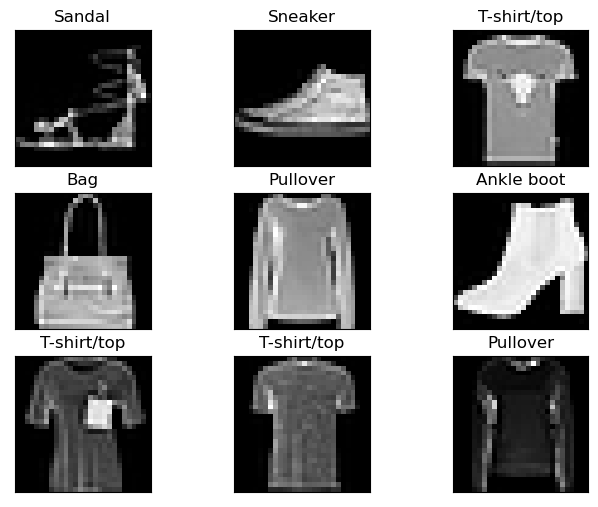

In [36]:
# 라벨 태그 만들기
class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

samples = np.random.randint(len(X_train), size=9)

plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title(class_names[y_train[idx]])
plt.show()

## 검증 데이터 분리 : train / validation

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


## 정규화

In [38]:
# Grayscale 이므로, 0~255 까지의 값을 가짐
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(np.max(X_train), np.min(X_train))

1.0 0.0


### shape 변경

In [39]:
X_train = (X_train.reshape((-1, 28*28)))
X_val = (X_val.reshape((-1, 28*28)))
X_test = (X_test.reshape((-1, 28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


## 원핫인코딩 (라벨)

In [40]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# 모델

In [61]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(784,)))
    model.add(layers.Dense(64, activation = 'relu', input_shape=(784,)))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [62]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## 컴파일

In [63]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam,
              loss = 'categorical_crossentropy',
              metrics=['acc'])

## 학습

In [64]:
EPOCHS = 100
BATCH_SIZE = 64

history = model.fit(X_train, y_train_oh,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val_oh),
           verbose = 1)

Epoch 1/100
657/657 [==============================] - 2s 2ms/step - loss: 0.6036 - acc: 0.7924 - val_loss: 0.4569 - val_acc: 0.8401
Epoch 2/100
657/657 [==============================] - 1s 2ms/step - loss: 0.4190 - acc: 0.8519 - val_loss: 0.4105 - val_acc: 0.8571
Epoch 3/100
657/657 [==============================] - 1s 2ms/step - loss: 0.3746 - acc: 0.8662 - val_loss: 0.3734 - val_acc: 0.8672
Epoch 4/100
657/657 [==============================] - 1s 2ms/step - loss: 0.3472 - acc: 0.8754 - val_loss: 0.3700 - val_acc: 0.8677
Epoch 5/100
657/657 [==============================] - 1s 2ms/step - loss: 0.3288 - acc: 0.8823 - val_loss: 0.3494 - val_acc: 0.8766
Epoch 6/100
657/657 [==============================] - 1s 2ms/step - loss: 0.3122 - acc: 0.8871 - val_loss: 0.3449 - val_acc: 0.8771
Epoch 7/100
657/657 [==============================] - 1s 2ms/step - loss: 0.3014 - acc: 0.8903 - val_loss: 0.3359 - val_acc: 0.8818
Epoch 8/100
657/657 [==============================] - 1s 2ms/step - 

657/657 [==============================] - 1s 2ms/step - loss: 0.1033 - acc: 0.9614 - val_loss: 0.5528 - val_acc: 0.8781
Epoch 63/100
657/657 [==============================] - 1s 2ms/step - loss: 0.0988 - acc: 0.9630 - val_loss: 0.5147 - val_acc: 0.8848
Epoch 64/100
657/657 [==============================] - 1s 2ms/step - loss: 0.1017 - acc: 0.9628 - val_loss: 0.5328 - val_acc: 0.8871
Epoch 65/100
657/657 [==============================] - 1s 2ms/step - loss: 0.0960 - acc: 0.9640 - val_loss: 0.5131 - val_acc: 0.8820
Epoch 66/100
657/657 [==============================] - 1s 2ms/step - loss: 0.0989 - acc: 0.9636 - val_loss: 0.5378 - val_acc: 0.8807
Epoch 67/100
657/657 [==============================] - 1s 2ms/step - loss: 0.0954 - acc: 0.9645 - val_loss: 0.5516 - val_acc: 0.8781
Epoch 68/100
657/657 [==============================] - 1s 2ms/step - loss: 0.0988 - acc: 0.9626 - val_loss: 0.5370 - val_acc: 0.8837
Epoch 69/100
657/657 [==============================] - 1s 2ms/step - loss:

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.legend()
    
    plt.show()

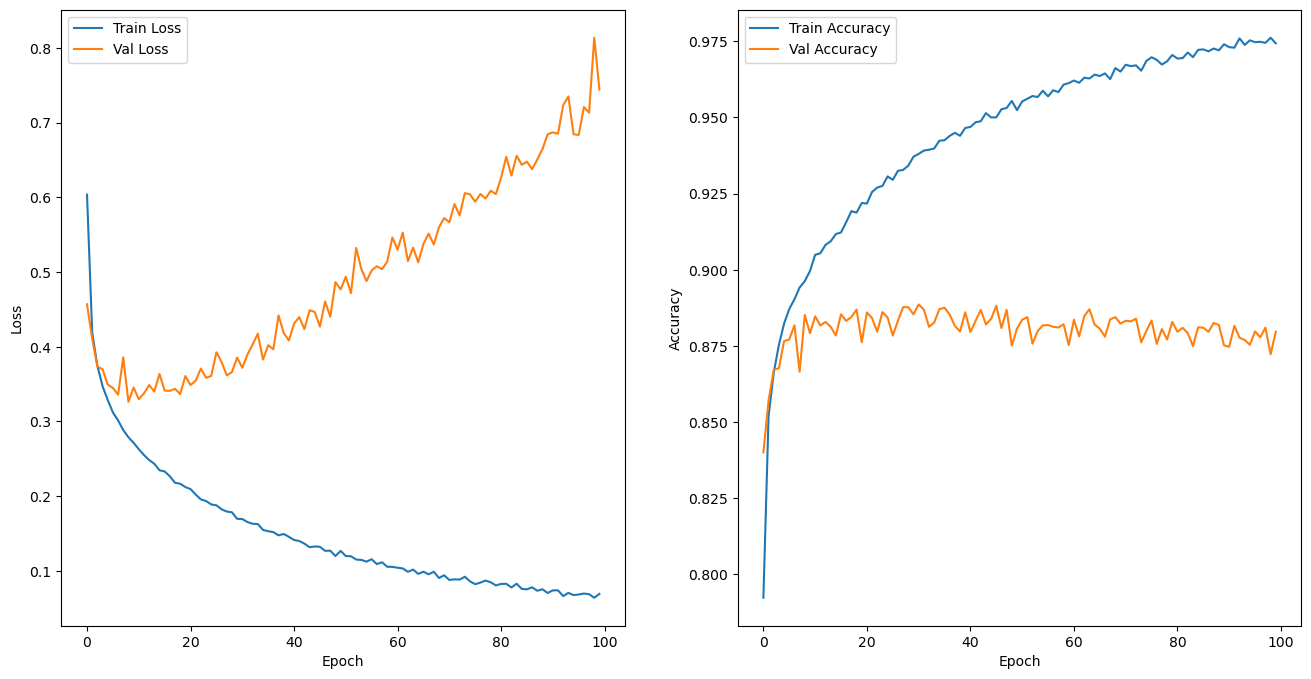

In [65]:
plot_history(history)

## 예측

In [56]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 1s 708us/step


array([[4.7486437e-27, 2.4779932e-35, 3.1411883e-20, 1.4995744e-16,
        7.4062344e-17, 5.0429348e-12, 3.8529869e-33, 1.5713100e-12,
        5.8853791e-25, 1.0000000e+00]], dtype=float32)

In [57]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

## 예측값 시각화

<Figure size 1600x600 with 0 Axes>

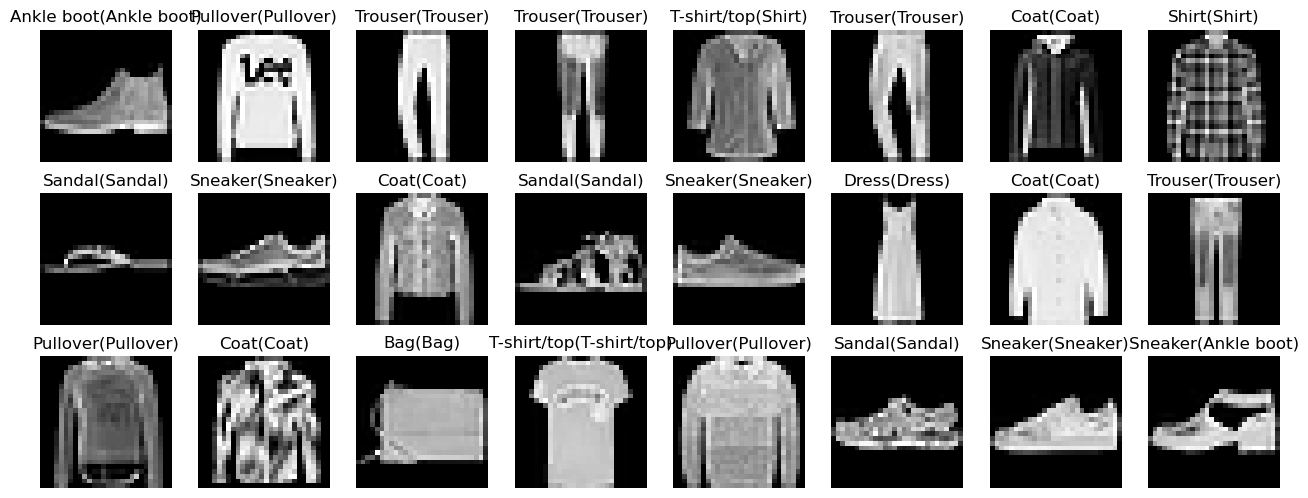

In [58]:
n_rows = 3
n_cols = 8

plt.figure(figsize=(n_cols * 2, n_rows * 2))
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
        plt.axis('off')
        plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

plt.show()

## 혼동행렬 시각화

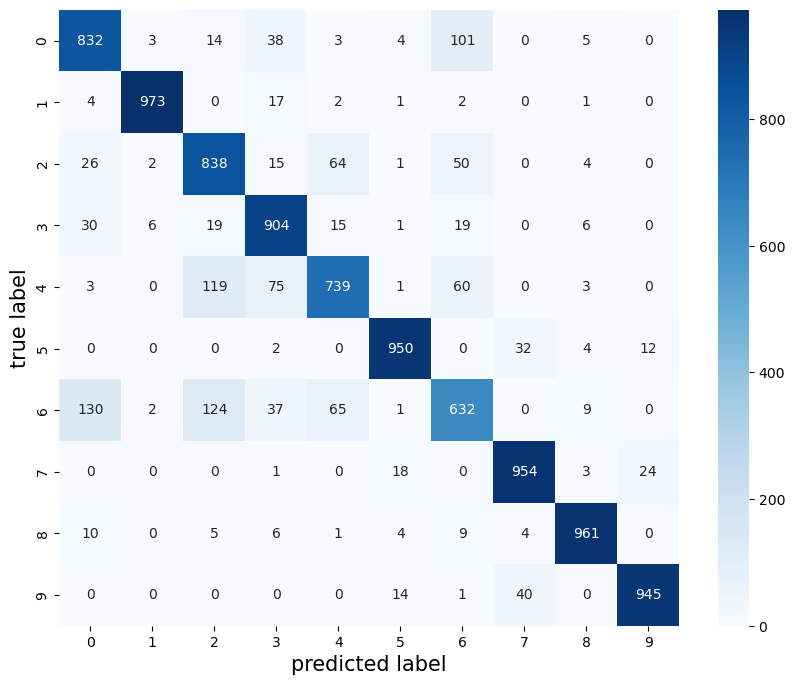

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
    plt.figure(figsize = (10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
    plt.xlabel('predicted label', fontsize = 15)
    plt.ylabel('true label', fontsize = 15)
    plt.show()
    
plot_matrix(y_test, y_pred_argmax)

## 평가 지표 계산

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
    print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
    print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
    print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
    print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))
    
print_score(y_test, y_pred_argmax)

accuracy: 0.873
precision: 0.873
recall_score: 0.873
f1_score: 0.872
